# Machine Learning
Logistic Regression



# Handwritten Digit Recognition using Logistic Regression

In this project, I implemented a Logistic Regression classifier to recognize handwritten digits (0–9) from the MNIST dataset of ~60,000 images.  
The workflow includes preprocessing the dataset (scaling and normalization), training the model, and evaluating its performance on unseen data.  
The model successfully predicts digits based on their handwritten drawings, showcasing the application of Logistic Regression in classification tasks.



In [ ]:
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/mnist_dataset.csv')
data.describe()




,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of X (features): (60000, 784)
Shape of y (labels): (60000,)


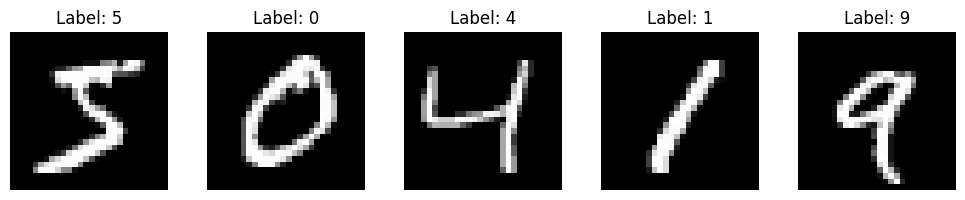

In [ ]:
X = data.drop('label', axis=1).values
y = data['label'].values
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Data Preprocessing



In [ ]:
data = pd.read_csv('/content/mnist_dataset.csv')
X = data.drop('label', axis=1)
y = data['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['label'] = y.values
X_scaled_df.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,9


In [ ]:
X_scaled_df.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.855375e-18,5.713948e-18,-1.835569e-18,-1.421085e-18,-2.486900e-18,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.418128e+01,8.907405e+01,1.499806e+02,1.513374e+02,1.788764e+02,0.0,0.0,0.0,0.0,9.000000


#Splitting the dataset


In [ ]:
shuffled_data = X_scaled_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

train_split = shuffled_data.iloc[:50000]
test_split = shuffled_data.iloc[50000:60000]
X_train = train_split.drop('label', axis=1).values
y_train = train_split['label'].values
X_test = test_split.drop('label', axis=1).values
y_test = test_split['label'].values

print("Dataset split completed using scaled data.")
print("Training set:", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)



Dataset split completed using scaled data.
Training set: (50000, 784) (50000,)
Testing set:  (10000, 784) (10000,)


#### Creating Logistic Regression classifier



In [ ]:
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1.0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def predict(X, W, b):
    logits = np.dot(X, W) + b
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

def train_logistic_regression(X_train, y_train, lr=0.01, epochs=100):
    num_samples, num_features = X_train.shape
    num_classes = 10

    y_train_encoded = one_hot_encode(y_train, num_classes)

    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))

    for epoch in range(epochs):
        logits = np.dot(X_train, W) + b
        y_pred = softmax(logits)
        loss = cross_entropy_loss(y_train_encoded, y_pred)

        grad_logits = (y_pred - y_train_encoded) / num_samples
        dW = np.dot(X_train.T, grad_logits)
        db = np.sum(grad_logits, axis=0, keepdims=True)

        W -= lr * dW
        b -= lr * db

    return W, b



W, b = train_logistic_regression(X_train, y_train, lr=0.01, epochs=100)



###Implementation of  evaluation functions



In [ ]:
def classification_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

def f1_score_macro(y_true, y_pred, num_classes=10):
    f1_scores = []
    for cls in range(num_classes):
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))

        precision = tp / (tp + fp + 1e-9 )  # I added 1e-9 in denominator to avoid zero division(divide by zero) error
        recall = tp / (tp + fn + 1e-9 )     # I added 1e-9 in denominator to avoid zero division(divide by zero) error

        f1 = 2 * precision * recall / (precision + recall + 1e-9)  #  I added 1e-9 in denominator to avoid zero division(divide by zero) error
        f1_scores.append(f1)

    return np.mean(f1_scores)

y_test_pred = predict(X_test, W, b)
acc = classification_accuracy(y_test, y_test_pred)
f1 = f1_score_macro(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score (Macro):", np.round(f1, 4))
print("Confusion Matrix:\n", cm)


Accuracy: 84.72%
F1 Score (Macro): 0.8453
Confusion Matrix:
 [[ 915    3    8    6    2    5   23    2    6    1]
 [   0 1136    4    0    0    1    3    1   12    2]
 [  20   60  806   21   28    0   32   19   27    3]
 [   6   50   28  789    2   13   14   20   23   14]
 [   2   34    7    1  823    5   10    5    8   59]
 [  21   67    3   98   23  618   23    8   13   23]
 [  21   28   11    0   10   14  930    0    5    0]
 [   3   41    7    1    7    0    1  931    2   45]
 [  16  116   16   58    7   24   10    7  716   35]
 [  14   25    4   20   50    4    0   52    5  808]]


#### Cross Validation



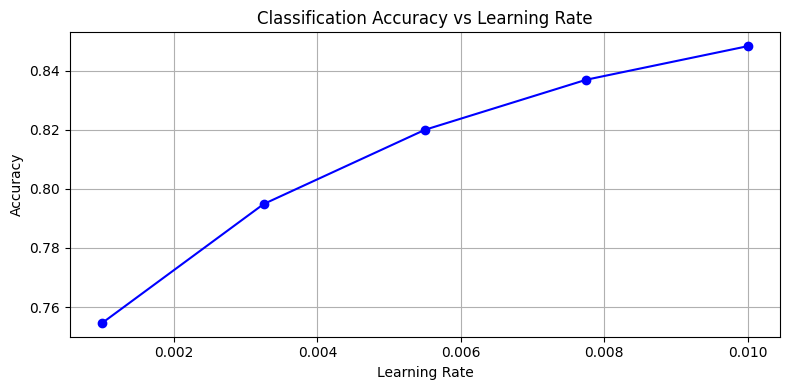

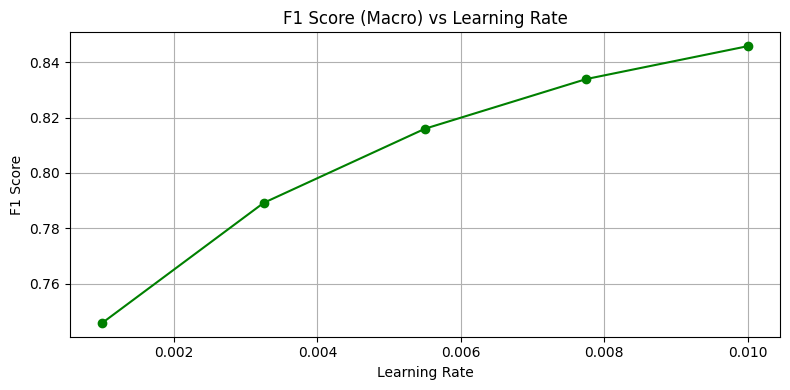

In [ ]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=['label'])
train_combined = pd.concat([X_train_df, y_train_df], axis=1)
shuffled = train_combined.sample(frac=1.0, random_state=42).reset_index(drop=True)
X_train = shuffled.drop('label', axis=1).values
y_train = shuffled['label'].values


learning_rates = np.linspace(0.001, 0.01, 5)

def cross_validation_5fold(X, y, learning_rates, epochs=20):
    fold_size = len(X) // 5
    accuracies = []
    f1_scores = []

    for lr in learning_rates:
        fold_acc = []
        fold_f1 = []

        for fold in range(5):
            start = fold * fold_size
            end = (fold + 1) * fold_size

            X_val = X[start:end]
            y_val = y[start:end]

            X_train_cv = np.concatenate((X[:start], X[end:]), axis=0)
            y_train_cv = np.concatenate((y[:start], y[end:]), axis=0)
            W, b = train_logistic_regression(X_train_cv, y_train_cv, lr=lr, epochs=epochs)

            y_val_pred = predict(X_val, W, b)

            acc = classification_accuracy(y_val, y_val_pred)
            f1 = f1_score_macro(y_val, y_val_pred)

            fold_acc.append(acc)
            fold_f1.append(f1)

        avg_acc = np.mean(fold_acc)
        avg_f1 = np.mean(fold_f1)
        accuracies.append(avg_acc)
        f1_scores.append(avg_f1)

    return accuracies, f1_scores

accuracies, f1_scores = cross_validation_5fold(X_train, y_train, learning_rates, epochs=100)

plt.figure(figsize=(8, 4))
plt.plot(learning_rates, accuracies, marker='o', color='blue')
plt.title("Classification Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(learning_rates, f1_scores, marker='o', color='green')
plt.title("F1 Score (Macro) vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Score")
plt.grid(True)
plt.tight_layout()
plt.show()



####  Classification

Finally, use the best value of the learning rate and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 80 and f1 score should be above 70 to get full points.

In [ ]:
best_lr = 0.010
epochs = 100
W_final, b_final = train_logistic_regression(X_train, y_train, lr=best_lr, epochs=epochs)
y_test_pred = predict(X_test, W_final, b_final)

final_accuracy = classification_accuracy(y_test, y_test_pred)
final_f1 = f1_score_macro(y_test ,y_test_pred)
final_cm = confusion_matrix(y_test, y_test_pred)

print("\nFinal Evaluation on Test Set:")
print("Classification Accuracy: {:.2f}%".format(final_accuracy * 100))
print("F1 Score (Macro): {:.2f}%".format(final_f1 * 100))
print("Confusion Matrix:\n", final_cm)


Final Evaluation on Test Set:
Classification Accuracy: 84.72%
F1 Score (Macro): 84.53%
Confusion Matrix:
 [[ 915    3    8    6    2    5   23    2    6    1]
 [   0 1136    4    0    0    1    3    1   12    2]
 [  20   60  806   21   28    0   32   19   27    3]
 [   6   50   28  789    2   13   14   20   23   14]
 [   2   34    7    1  823    5   10    5    8   59]
 [  21   67    3   98   23  618   23    8   13   23]
 [  21   28   11    0   10   14  930    0    5    0]
 [   3   41    7    1    7    0    1  931    2   45]
 [  16  116   16   58    7   24   10    7  716   35]
 [  14   25    4   20   50    4    0   52    5  808]]


###  Logistic Regression classifier using scikit-learn


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.metrics import f1_score
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro): {:.2f}%".format(f1 * 100))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n Classification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 91.09%
F1 Score (Macro): 90.96%
Confusion Matrix:
 [[ 929    0    9    1    1   16    6    1    5    3]
 [   1 1114    8    4    2    2    2    4   18    4]
 [   8   20  897   21    9    2   15   10   30    4]
 [   7    5   26  823    3   43    5   15   20   12]
 [   4    5    6    1  880    6    8    9    7   28]
 [   9    3    5   31   18  787   12    2   22    8]
 [  11    6   12    1   11   18  952    2    6    0]
 [   0    2   12    6   10    0    2  964    3   39]
 [   9   25   12   30    3   23    2    3  882   16]
 [   2    3    3   13   29   10    1   32    8  881]]

 Classification report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       971
           1       0.94      0.96      0.95      1159
           2       0.91      0.88      0.89      1016
           3       0.88      0.86      0.87       959
           4       0.91      0.92      0.92       954
           5       0.87      0.88      0.87       897
   